In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier

In [2]:
df=pd.read_csv('Bank Churn.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data pre-processing

In [3]:
df.shape  #shape of data

(10000, 13)

In [4]:
df.columns  #columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.dtypes  #data types

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.describe()  #central tendencies of numerical columns

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()  #null values

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
cat=['Geography', 'Gender','Exited']
for i in cat:
    a=df[i].value_counts()
    print(a)

France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
0    7963
1    2037
Name: Exited, dtype: int64


In [9]:
df['Geography']=df['Geography'].replace(['germany','gernamy','GERMANY','ger'],'Germany')
df['Geography']=df['Geography'].replace(['spain','espanio'],'Spain')
df['Geography']=df['Geography'].replace(['fra','france'],'France')

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

[ 987.  968. 1006. 1027. 1002. 1027. 1007.  982. 1009.  985.]


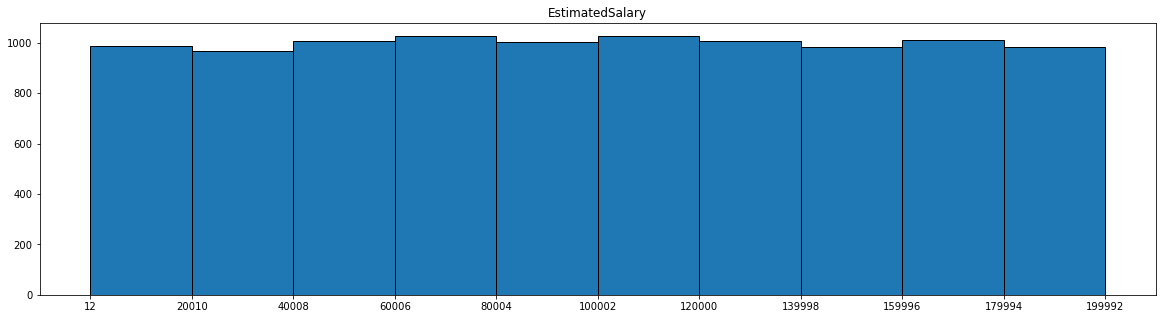

[  19.  166.  447.  958. 1444. 1866. 1952. 1525.  968.  655.]


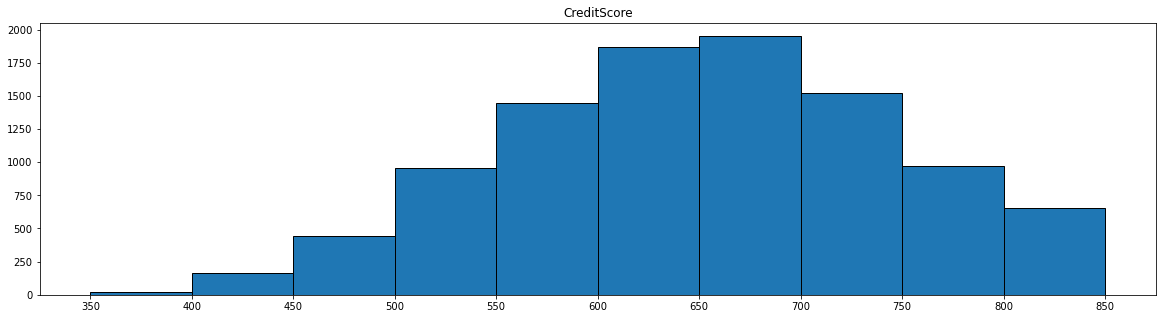

[3.623e+03 6.900e+01 3.600e+02 1.173e+03 2.081e+03 1.747e+03 7.290e+02
 1.860e+02 3.000e+01 2.000e+00]


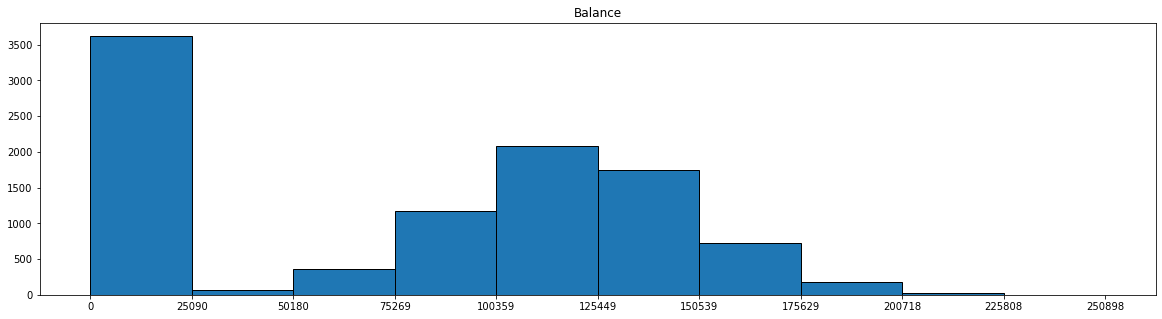

In [11]:
num=['EstimatedSalary','CreditScore','Balance']
for i in num:
    plt.figure(figsize=(20,5))
    n,bins,patches=plt.hist(df[i],edgecolor='black')
    plt.xticks(bins)
    plt.title(i)
    print(n)
    plt.show()
    

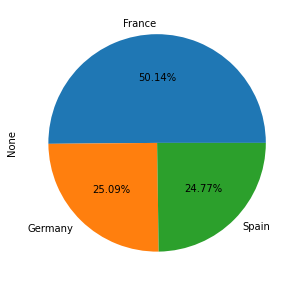

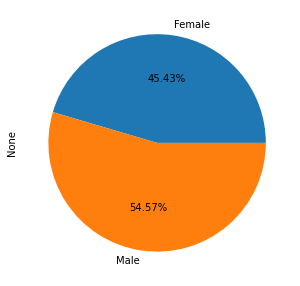

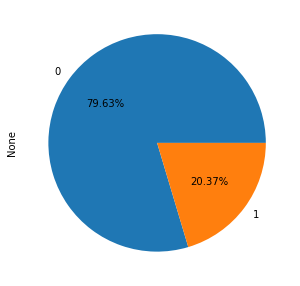

In [12]:
for i in cat:
    plt.figure(figsize=(20,5))
    df.groupby(i).size().plot(kind='pie',autopct='%0.2f%%');

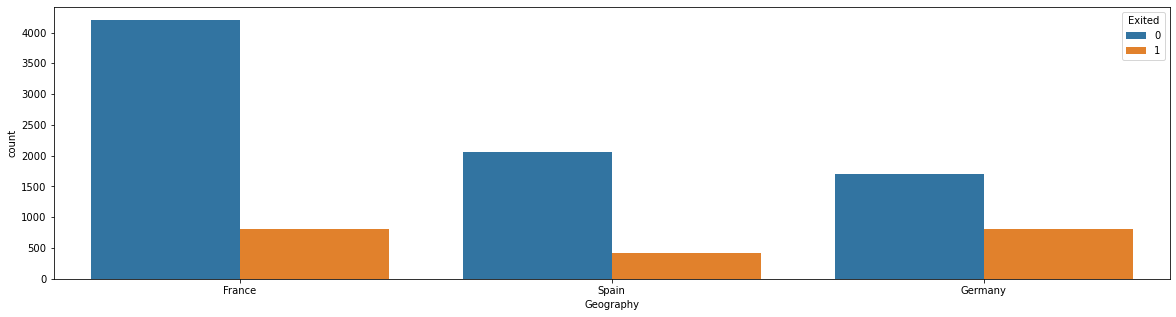

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(df['Geography'],hue=df['Exited']);

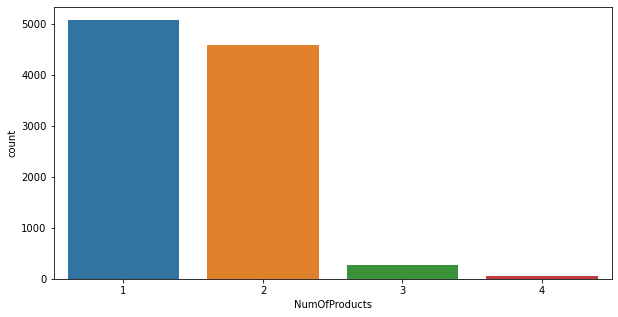

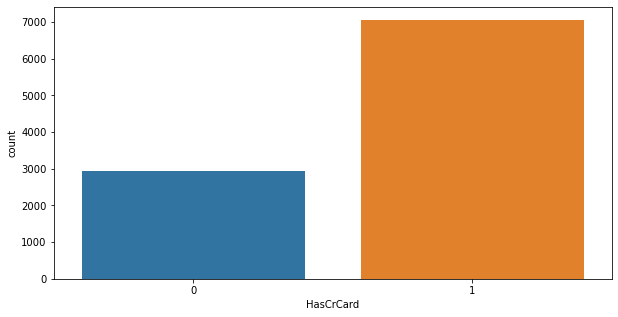

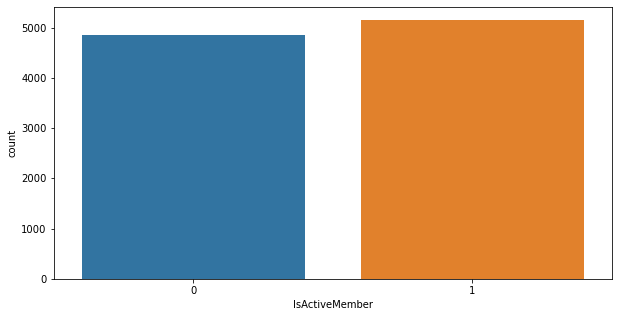

In [14]:
rem=['NumOfProducts', 'HasCrCard', 'IsActiveMember']
for i in rem:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i]);
    

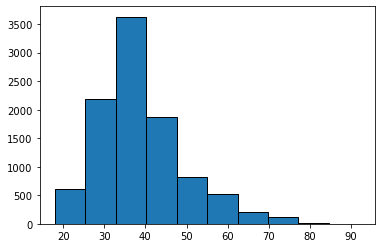

In [15]:
plt.hist(df['Age'],edgecolor='black');

In [16]:
df.drop(['CustomerId', 'Surname'],axis=1,inplace=True)
df1=df.copy()
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Feature Engineering

In [17]:
encoder=preprocessing.LabelEncoder()
for i in ['Geography','Gender']:
    df1[i]=encoder.fit_transform(df1[i])
    
z=df1.copy()
z.drop('Exited',axis=1,inplace=True)
z.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [18]:
scaler=preprocessing.StandardScaler()
df_sd=pd.DataFrame(scaler.fit_transform(z),columns=z.columns)
df_sd

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


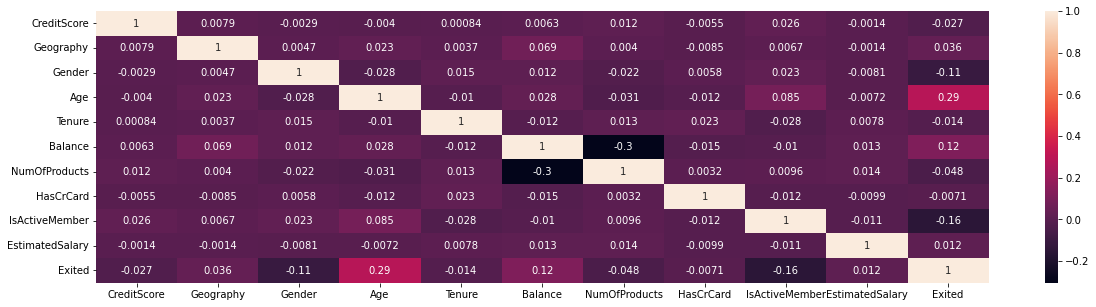

In [19]:
plt.figure(figsize=(20,5))
sns.heatmap(df1.corr(),annot=True);

In [20]:
x=df_sd
y=df['Exited']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
#Logistic Regression

In [23]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
lr.score(x_train,y_train)

0.807125

In [25]:
yp=lr.predict(x_test)

In [26]:
accuracy=accuracy_score(y_test,yp)
f1=f1_score(y_test,yp)
print('Acuuracy:',round(accuracy,4))
print('F1_score:',round(f1,4))

Acuuracy: 0.815
F1_score: 0.2773


In [27]:
from sklearn.metrics import r2_score

In [28]:
from sklearn.metrics import roc_auc_score,roc_curve

In [29]:
ns_probs=[0 for i in range(len(y_test))]
lr_probs=lr.predict_proba(x_test)[:,1]
ns_auc=roc_auc_score(y_test,ns_probs)
lr_auc=roc_auc_score(y_test,lr_probs)

ROC_AUC : NO SKILL: 0.5
ROC_AUC : LOGISTIC: 0.7636


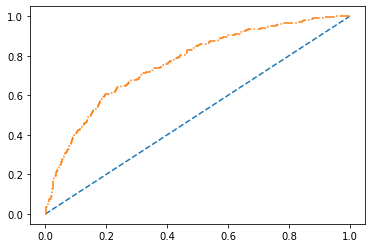

In [30]:
ns_fpr,ns_tpr,i=roc_curve(y_test,ns_probs)
lr_fpr,lr_tpr,i=roc_curve(y_test,lr_probs)
plt.plot(ns_fpr,ns_tpr,linestyle='--',label='NO Skill')
plt.plot(lr_fpr,lr_tpr,linestyle='-.',label='Logistic')
print('ROC_AUC : NO SKILL:',round(ns_auc,4))
print('ROC_AUC : LOGISTIC:',round(lr_auc,4))

In [31]:
#Naive bayes

In [32]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [33]:
nb.score(x_train,y_train)

0.829875

In [34]:
yp1=nb.predict(x_test)

In [35]:
nb_accuracy=accuracy_score(y_test,yp1)
nb_f1=f1_score(y_test,yp1)
print('Acuuracy:',round(nb_accuracy,4))
print('F1_score:',round(nb_f1,4))

Acuuracy: 0.8285
F1_score: 0.354


In [36]:
nb_probs=nb.predict_proba(x_test)[:,1]
nb_auc=roc_auc_score(y_test,nb_probs)

ROC_AUC : NO SKILL: 0.5
ROC_AUC : LOGISTIC: 0.7636
ROC_AUC : NAIVE: 0.8151


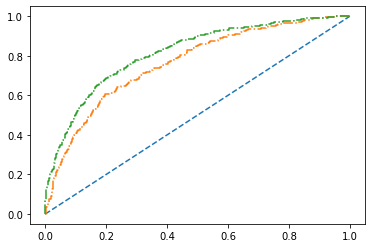

In [37]:
nb_fpr,nb_tpr,i=roc_curve(y_test,nb_probs)
plt.plot(ns_fpr,ns_tpr,linestyle='--',label='NO Skill')
plt.plot(lr_fpr,lr_tpr,linestyle='-.',label='Logistic')
plt.plot(nb_fpr,nb_tpr,linestyle='-.',label='Naive')
print('ROC_AUC : NO SKILL:',round(ns_auc,4))
print('ROC_AUC : LOGISTIC:',round(lr_auc,4))
print('ROC_AUC : NAIVE:',round(nb_auc,4))

In [38]:
#Decision tree classifier

In [39]:
dtc=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
dtc.score(x_train,y_train)

0.84825

In [41]:
skf=StratifiedKFold(n_splits=4)

In [42]:
from sklearn.model_selection import cross_val_score
dtc_accuracy=cross_val_score(dtc,x,y,cv=skf,scoring='accuracy')
print('Accuracy:',round(dtc_accuracy.mean(),4))

Accuracy: 0.8463


In [43]:
dtc_f1=cross_val_score(dtc,x,y,cv=skf,scoring='f1')
print('F1_score:',round(dtc_f1.mean(),4))

F1_score: 0.4677


In [44]:
dtc_probs=dtc.predict_proba(x_test)[:,1]
dtc_auc=roc_auc_score(y_test,dtc_probs)

ROC_AUC : NO SKILL: 0.5
ROC_AUC : LOGISTIC: 0.7636
ROC_AUC : NAIVE: 0.8151
ROC_AUC : DTC: 0.8215


Text(0.5, 1.0, 'Roc_Auc Curve')

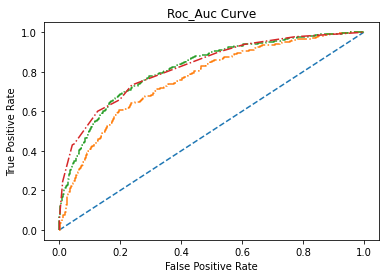

In [45]:
dtc_fpr,dtc_tpr,i=roc_curve(y_test,dtc_probs)
plt.plot(ns_fpr,ns_tpr,linestyle='--',label='NO Skill')
plt.plot(lr_fpr,lr_tpr,linestyle='-.',label='Logistic')
plt.plot(nb_fpr,nb_tpr,linestyle='-.',label='Naive')
plt.plot(dtc_fpr,dtc_tpr,linestyle='-.',label='DTC')
print('ROC_AUC : NO SKILL:',round(ns_auc,4))
print('ROC_AUC : LOGISTIC:',round(lr_auc,4))
print('ROC_AUC : NAIVE:',round(nb_auc,4))
print('ROC_AUC : DTC:',round(dtc_auc,4))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc_Auc Curve')

In [46]:
#Random forest Classifier

In [47]:
rfc=RandomForestClassifier(max_depth=4,n_estimators=10,oob_score=True)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=10, oob_score=True)

In [48]:
rfc.score(x_train,y_train)

0.850625

In [49]:
grid={'max_depth':[4,5,6],'criterion':['gini','entropy'],'n_estimators':[10,11,12]}

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid_search=GridSearchCV(estimator=rfc,param_grid=grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=10,
                                              oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6], 'n_estimators': [10, 11, 12]},
             scoring='accuracy')

In [52]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=10,
                       oob_score=True)

In [53]:
rfc1=RandomForestClassifier(max_depth=6,n_estimators=12,oob_score=True)
rfc1.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=12, oob_score=True)

In [54]:
rfc1.score(x_train,y_train)

0.861125

In [55]:
rfc_accuracy=cross_val_score(rfc1,x,y,cv=skf,scoring='accuracy')
print('Accuracy:',round(rfc_accuracy.mean(),4))

Accuracy: 0.8567


In [56]:
rfc_f1=cross_val_score(rfc1,x,y,cv=skf,scoring='f1')
print('F1_score:',round(rfc_f1.mean(),4))

F1_score: 0.5126


In [67]:
dict={'Model':['Logistic','Naive Bayes','Decision tree classifier','Random forest'],'Training performance':[0.8071,0.8298,0.8482,0.8611],'Accuracy':[accuracy,nb_accuracy,dtc_accuracy.mean(),rfc_accuracy.mean()],'F1_score':[f1,nb_f1,dtc_f1.mean(),rfc_f1.mean()]}
compare=pd.DataFrame(dict)
compare

,Model,Training performance,Accuracy,F1_score
0,Logistic,0.8071,0.8150,0.277344
1,Naive Bayes,0.8298,0.8285,0.354049
2,Decision tree classifier,0.8482,0.8463,0.467747
3,Random forest,0.8611,0.8567,0.512562


there is overfitting problem , testing performance is bad

used random forest method to control overfitting problem

Random forest has performed better than all algorithms

In [58]:
ypp=rfc1.predict(x_test)

In [59]:
r2_score(y_test,ypp)

0.10696048300137273

In [60]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [70]:
x1=df1.iloc[:,0:10]
y1=df1['Exited']

In [71]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,train_size=0.8,random_state=42)

In [72]:
rfc1

RandomForestClassifier(max_depth=6, n_estimators=12, oob_score=True)

In [73]:
rfc1.fit(x1_train,y1_train)

RandomForestClassifier(max_depth=6, n_estimators=12, oob_score=True)

In [74]:
rfc1.score(x1_train,y1_train)

0.861375

In [75]:
ddf=pd.DataFrame()

In [88]:
def extra():
    cs=int(input('Enter credit score:'))
    geo=int(input('Enter Location between 0,1&2:'))
    gen=int(input('Enter Gender between 0&1:'))
    age=int(input('Enter age:'))
    tenure=int(input('Enter Tenure with the bank:'))
    balance=int(input('Enter bank balance of customer'))
    nop=int(input('no of products currently held?'))
    hascr=int(input('1 if you have cc with bank or 0:'))
    iam=int(input('1 if active member of bank or 0:'))
    es=int(input('Estimated salary of customer:'))
    l=[cs,geo,gen,age,tenure,balance,nop,hascr,iam,es]
    train=np.array(l).reshape(1,-1)
    yp=rfc1.predict(train)
    print(yp)
    ddf['CreditScore']=cs
    ddf['Geography']=geo
    ddf['Gender']=gen
    ddf['Age']=age
    ddf['Tenure']=tenure
    ddf['Balance']=balance
    ddf['NumOfproducts']=nop
    ddf['HasCrCard']=hascr
    ddf['IsActiveMember']=iam
    ddf['EstimatedSalary']=es
    ddf['Exited']=yp
   
    
    

In [93]:
extra()
ddf.to_csv('extra.csv')

Enter credit score:230
Enter Location between 0,1&2:2
Enter Gender between 0&1:0
Enter age:24
Enter Tenure with the bank:1
Enter bank balance of customer2300
no of products currently held?0
1 if you have cc with bank or 0:1
1 if active member of bank or 0:0
Estimated salary of customer:1200
[1]


In [96]:
x1_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,1,43,1,0.00,2,1,1,146379.30
1731,601,2,0,44,4,0.00,2,1,0,58561.31
4742,506,1,1,59,8,119152.10,2,1,1,170679.74
4521,560,2,0,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...
6412,602,1,0,53,5,98268.84,1,0,1,45038.29
8285,609,0,1,25,10,0.00,1,0,1,109895.16
7853,730,0,0,47,7,0.00,1,1,0,33373.26
1095,692,0,1,29,4,0.00,1,1,0,76755.99


In [97]:
def extra2():
    predict=rfc1.predict(x1_test)
    dict={'CreditScore':x1_test['CreditScore'],'Geography':x1_test['Geography'],'Gender':x1_test['Gender'],'Age':x1_test['Age'],'Tenure':x1_test['Tenure'],'Balance':x1_test['Balance'],'NumOfProducts':x1_test['NumOfProducts'],'HasCrCard':x1_test['HasCrCard'],'IsActiveMember':x1_test['IsActiveMember'],'EstimatedSalary':x1_test['EstimatedSalary'],'Exited':predict}
    compare=pd.DataFrame(dict)
    compare.to_csv('extra2.csv')
    return compare
    
    
    

In [98]:
extra2()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6252,596,1,1,32,3,96709.07,2,0,0,41788.37,0
4684,623,0,1,43,1,0.00,2,1,1,146379.30,0
1731,601,2,0,44,4,0.00,2,1,0,58561.31,0
4742,506,1,1,59,8,119152.10,2,1,1,170679.74,0
4521,560,2,0,27,7,124995.98,1,1,1,114669.79,0
...,...,...,...,...,...,...,...,...,...,...,...
6412,602,1,0,53,5,98268.84,1,0,1,45038.29,0
8285,609,0,1,25,10,0.00,1,0,1,109895.16,0
7853,730,0,0,47,7,0.00,1,1,0,33373.26,1
1095,692,0,1,29,4,0.00,1,1,0,76755.99,0


In [99]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


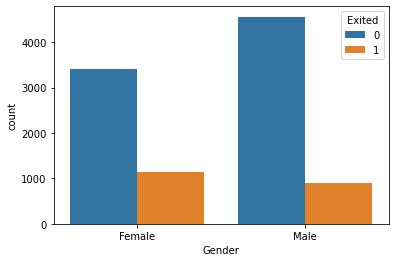

In [100]:
sns.countplot(df['Gender'],hue=df['Exited']);

In [105]:
pd.crosstab(df['Gender'],df['Exited'])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


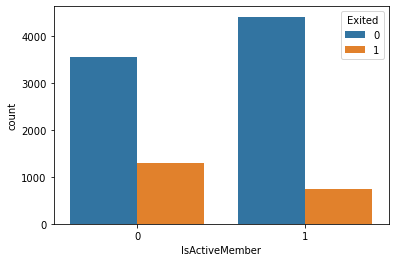

In [101]:
sns.countplot(df['IsActiveMember'],hue=df['Exited']);

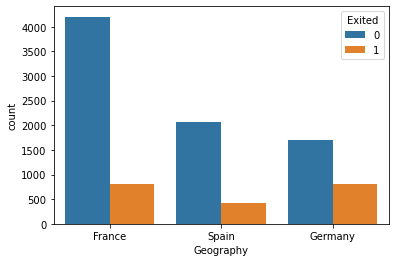

In [104]:
sns.countplot(df['Geography'],hue=df['Exited']);

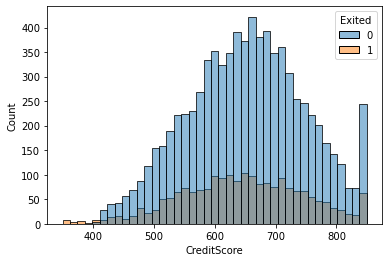

In [109]:
sns.histplot(x=df['CreditScore'],hue=df['Exited']);

<AxesSubplot:xlabel='CreditScore', ylabel='Gender'>

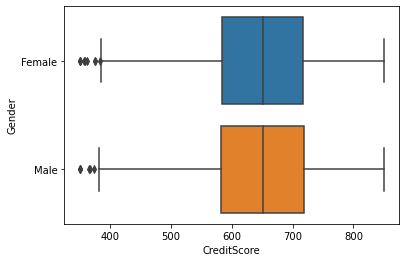

In [117]:
sns.boxplot(x=df['CreditScore'],y=df['Gender'])

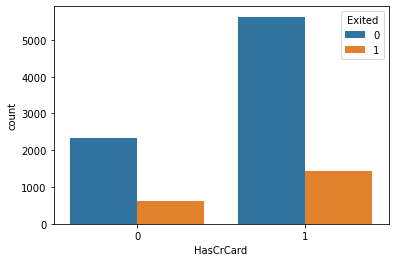

In [118]:
sns.countplot(df['HasCrCard'],hue=df['Exited']);

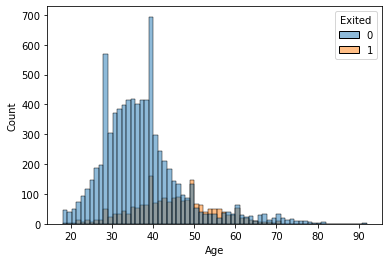

In [120]:
sns.histplot(x=df['Age'],hue=df['Exited']);